# Test Profile Results

This code will analize the output of `test_apps_checker.sh` script and will create a visual representaion of how fast each of the rules are running

## Preconditions

`.tmp/profile` directory with profiled `.json` files.

## Import libararies

In [1]:
import pandas as pd 
import os
import json
import matplotlib.pyplot as plt 

## Traserve files and obtain its content

In [32]:
big_json = []
names = []
for filename in os.listdir(os.getcwd() + "/.tmp/profile"):
    with open(os.path.join(os.getcwd() + "/.tmp/profile", filename), 'r') as f:
       json_text = json.loads(f.read())
       big_json.append(json_text["profile"])
       filename = os.path.basename(f.name)[22:].split('.c')[0]
       names.append(filename)

# Create a dataframe and fix the columns

In [33]:
df = pd.DataFrame(big_json)
df['File Name'] = names
columns = df.columns.tolist()
columns.insert(0, columns.pop())
df = df[columns]
print(df[:10]) 


          File Name  time.clang-tidy.cert-dcl03-c.wall  \
0      2-asrc_flite                           0.007950   
1  7-avf_ahistogram                           0.056664   
2       2-f_latency                           0.021461   
3     4-af_aexciter                           0.022786   
4   0-vf_cropdetect                           0.052406   

   time.clang-tidy.cert-dcl03-c.user  time.clang-tidy.cert-dcl03-c.sys  \
0                           0.006488                          0.001537   
1                           0.032598                          0.007613   
2                           0.020599                          0.000557   
3                           0.019892                          0.002062   
4                           0.044578                          0.008061   

   time.clang-tidy.cert-dcl51-cpp.wall  time.clang-tidy.cert-dcl51-cpp.user  \
0                             1.512055                             1.156413   
1                             1.387177          

## Remove unnecessary dataframe parts

In [34]:
# remove dataframe parts
df = df[df.columns.drop(list(df.filter(regex='.*\.sys|.*\.wall')))]

## Plot the checker results time and the files

<AxesSubplot: xlabel='File Name'>

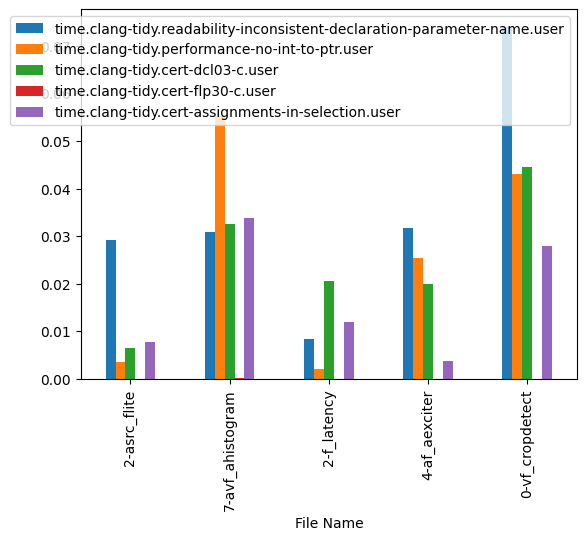

In [37]:
df[:10].plot(
    x="File Name",
    y=[
        "time.clang-tidy.readability-inconsistent-declaration-parameter-name.user",
        "time.clang-tidy.performance-no-int-to-ptr.user",
        "time.clang-tidy.cert-dcl03-c.user",
        "time.clang-tidy.cert-flp30-c.user",
        "time.clang-tidy.cert-assignments-in-selection.user", 
    ], 
    kind="bar"
)

In [42]:
df.nlargest(1,'time.clang-tidy.cert-assignments-in-selection.user').iloc[:, 10:]

,time.clang-tidy.cert-mem57-cpp.user,time.clang-tidy.cert-flp37-c.user,time.clang-tidy.cert-err33-c.user,time.clang-tidy.cert-err34-c.user,time.clang-tidy.cert-env33-c.user,time.clang-tidy.cert-assignments-in-selection.user,time.clang-tidy.cert-pos44-c.user,time.clang-tidy.cert-dcl16-c.user,time.clang-tidy.cert-pos47-c.user,time.clang-tidy.cert-dcl37-c.user,time.clang-tidy.cert-str34-c.user,time.clang-tidy.performance-type-promotion-in-math-fn.user,time.clang-tidy.cert-sig30-c.user,time.clang-tidy.cert-msc32-c.user,time.clang-tidy.cert-fio38-c.user,time.clang-tidy.cert-con36-c.user,time.clang-tidy.cert-msc30-c.user,time.clang-tidy.cert-exp42-c.user
1,0.000009,0.024178,0.204305,0.001745,0.000968,0.03374,0.000876,0.583946,0.001198,1.089885,0.065243,0.016761,0.001756,0.000919,0.227918,0.003338,0.032023,0.001041
